C:\Users\basti\AppData\Local\Temp\ipykernel_11468\4206267978.py:30: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)
C:\Users\basti\AppData\Local\Temp\ipykernel_11468\4206267978.py:39: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)


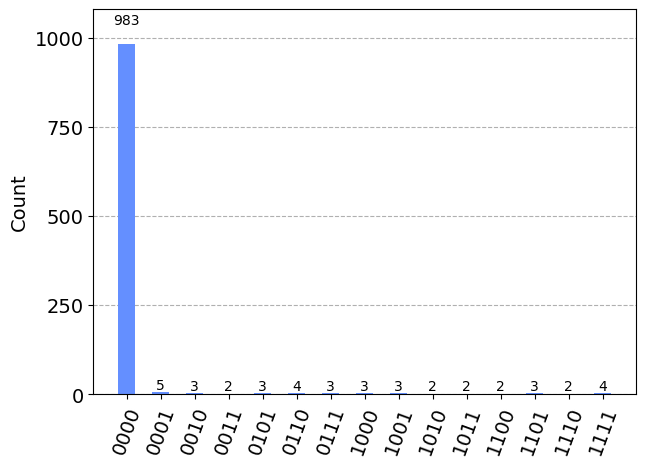

In [4]:
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# Paramètres de l'algorithme de Grover
num_qubits = 2
grimoire_index = 1

# Vérification de l'index du grimoire
if grimoire_index >= 2**num_qubits:
    raise ValueError("L'index du grimoire est hors de la plage valide.")

# Initialisation du circuit quantique
qr = QuantumRegister(num_qubits, 'qr')
cr = ClassicalRegister(num_qubits, 'cr')
grover_circuit = QuantumCircuit(qr, cr)

# Superposition initiale
grover_circuit.h(range(num_qubits))

# Nombre d'itérations recommandé pour Grover
num_iterations = int(np.pi/4 * np.sqrt(2**num_qubits))

# Application de l'algorithme de Grover
for _ in range(num_iterations):
    # Oracle
    for qubit in range(num_qubits):
        grover_circuit.x(qubit)
    grover_circuit.h(num_qubits-1)  # Correction ici
    grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)
    grover_circuit.h(num_qubits-1)
    for qubit in range(num_qubits):
        grover_circuit.x(qubit)

    # Diffusion
    grover_circuit.h(range(num_qubits))
    grover_circuit.x(range(num_qubits))
    grover_circuit.h(num_qubits-1)
    grover_circuit.mct(list(range(num_qubits-1)), num_qubits-1)  
    grover_circuit.h(num_qubits-1)
    grover_circuit.x(range(num_qubits))
    grover_circuit.h(range(num_qubits))

# Mesure des qubits
grover_circuit.measure(qr, cr)

# Simulation du circuit quantique
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(compiled_circuit).result()

# Affichage des résultats
counts = result.get_counts(grover_circuit)
plot_histogram(counts)